In [1]:
import pandas as pd
import numpy as np

### pandas的数据结构

    Seires和DataFrame，Series是一种类似于一维数组的对象(各种Numpy)以及一组与之相关的数据标签（即索引）组成。仅有一组数据即可以产生最简单的Series

In [2]:
obj = pd.Series([4,7,-5,3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

可以通过index和values来获取数组和索引对象

In [3]:
print(obj.values)
print(obj.index)

[ 4  7 -5  3]
RangeIndex(start=0, stop=4, step=1)


可以创建一个对各个数据点进行描述的索引 

In [4]:
obj2 = pd.Series([4,7,-5,3],index=['b','d','a','c'])
print(obj2)
print(obj2.index)

b    4
d    7
a   -5
c    3
dtype: int64
Index(['b', 'd', 'a', 'c'], dtype='object')


使用Numpy函数或类似Numpy的运算（如根据布尔型数组进行过滤、标量乘法、应用数学函数）都会保留索引链接 

In [5]:
obj2[obj2>2]

b    4
d    7
c    3
dtype: int64

In [6]:
obj2*2

b     8
d    14
a   -10
c     6
dtype: int64

In [7]:
np.exp(obj2)

b      54.598150
d    1096.633158
a       0.006738
c      20.085537
dtype: float64

如果数据放在一个python字典中，也可以直接通过字典来创建Series 

In [8]:
sdata = {'Ohio':35000,'Texas':71000,'Oregon':16000,'Utah':5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

如果只传入一个字典，则Series中的索引就是原字典的键(有序排列)。你可以传入排好的字典的键来改变顺序

In [9]:
states=['California','Ohio','Oregon','Texas']
obj4 = pd.Series(sdata,states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

    上个例子中，sdata中跟states索引相匹配的那三个值会被找出来并放在相应位置上，但由于"California"所对应的sdata值找不到，所有结果就为NaN（Not a Number），在pandas中，表示缺失或NA值。因为Utah不在states中，它被从结果中除去
    将缺失missing或NA表示缺失数据。pandas的isnull和notnull函数可用于 检测缺失数据

In [10]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [11]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [12]:
#Series也有类似这样的方法
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

Series 会根据运算的索引标签自动对齐数据

In [13]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [14]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [15]:
obj3+obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Series有name属性，该属性跟pandas其他的关键功能关系非常相似

In [16]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

Series 的索引可以通过赋值的方式进行修改

In [17]:
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [18]:
obj.index = ['Bob','Steve','Jeff','Ryan']

In [19]:
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

# DataFrame 

DataFrame 是一个表格型的数据结构，他含有一组有序的列，每列可以是不同的值类型(数值、字符串、布尔值等)。DataFrame既有行索引也有列索引，他可以被看作由Series组成的字典（共用一个索引）。DataFrame中的数据是以一个或者多个二维块存放的（而不是列表、字典或别的一位数据结构）

建立DataFrame的办法有很多，最常用的一种传入一个由等长列表或Numpy数组组成的字典

In [20]:
data = {'state':['Ohio','Ohio','Ohio','Nevada','Nevada','Nevada'],
       'year':[2000,2001,2002,2001,2002,2003],
       'pop':[1.5,1.7,3.6,2.4,2.9,3.2]}
frame = pd.DataFrame(data)

In [21]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


head()方法会选取前五行

如果指定了列序列，则DataFrame的列就会按照指定顺序进行排列：

In [22]:
pd.DataFrame(data,columns=['year','state','pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


如果传入的数据中找不到，就会在结果中产生缺失值

In [23]:
frame2 = pd.DataFrame(data,columns=['year','state','pop','debt'],
                     index = ['one','two','three','four','five','six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


可以通过类似字典的方式或者属性的方式获得DataFrame的一个Series

In [24]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [25]:
frame2.state

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

行可以通过位置名称的方式进行获取，比如用loc属性

In [26]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

列可以通过赋值的方式进行修改。例如我们可以给那个空的'debt'赋上标量或一组值

In [27]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [28]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


将列表或数组赋值给某个列时，其长度必须跟DataFrame的长度相匹配。如果赋值的是一个Series，就会精确匹配到DataFrame的索引，所有的空位都将被填上缺失值

In [29]:
val = pd.Series([-1.2,-1.5,-1.7],index=['two','four','five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


为不存在的列值会创建一个新列。关键字del用于删除列

In [30]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


### 不能用frame.eastern来创建新的列

In [31]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

另一种常见的数据形式是嵌套字典

In [32]:
pop = {'Nevada':{2001:2.4,2002:2.9},
      'Ohio':{200:1.5,2001:1.7,2002:3.6}}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
200,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


也可以用类似Numpy的方式对其进行反转

In [33]:
frame3.T

,200,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


# 5.2基本功能 

#### 重要 索引
    pandas对象的一个重要方法是reindex，其作用是创建一个新对象，他的数据是符合 新的所引导，eg：

In [34]:
obj = pd.Series([4.5,7.2,-5.3,3.6],index=['d','b','a','c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

`该Series的reindex将会根据索引进行重排。如果某个索引不存在，就引入缺失值

In [35]:
obj2 = obj.reindex(['a','b','c','d','e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

对于时间序列这样的有序数据，重新索引时可能需要一些插值处理。mehod选项即可达到此目的，例如使用ffill可以实现前向填充

In [36]:
obj3 = pd.Series(['blue','purple','yellow'],index = [0,2,4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [37]:
obj3.reindex(range(6),method = 'ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

借助DataFrame,reindex可以修改行索引和列。只需传递一个序列时，会重新索引的结果

In [38]:
frame = pd.DataFrame(np.arange(9).reshape((3,3)),
                    index=['a','c','d'],
                    columns=['Ohio','Texas','California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [39]:
frame2 = frame.reindex(['a','b','c','d'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


列可以用columns关键字来进行重新索引

In [40]:
states = ['Texas','Utah','California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


###  丢弃指定轴的项

丢弃某条轴上的一个或多个项，用drop方法

In [41]:
obj = pd.Series(np.arange(5.),index=['a','b','c','d','e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [42]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [43]:
obj.drop(['d','c'])

a    0.0
b    1.0
e    4.0
dtype: float64

对于DataFrame，可以删除任意轴上的索引值。

In [44]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


用标签调用drop会从行标签（axis 0）删除值：m

In [45]:
data.drop(['Colorado','Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


或通过axis=1或axis='columns'可以删除的值：

In [46]:
data.drop('two',axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [47]:
data.drop(['two','four'],axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


许多函数，如drop，会修改Series或者DataFrame的大小或者形状，可以就地修改对象，不需要返回新对象

In [48]:
obj.drop('c',inplace=True)
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

# 索引、选取和过滤

Series索引的工作方式类似于Numpy数组的索引，只不过Series的索引值不只是整数

In [49]:
obj = pd.Series(np.arange(4.),index=['a','b','c','d'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [50]:
obj['b']

1.0

In [51]:
obj[1]

1.0

In [52]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [53]:
obj[['b','a','d']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [54]:
obj[[1,3]]

b    1.0
d    3.0
dtype: float64

In [55]:
obj[obj<2]

a    0.0
b    1.0
dtype: float64

###### 切片运算与Numpy不同，其末端是包含的

In [56]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [57]:
obj['b':'c'] = 5.0
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [58]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                     columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [59]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [60]:
data[['three','one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [61]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [62]:
data[data['three']>5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [63]:
data<5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [64]:
data[data<5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


## 用loc和iloc进行选取
    对于DataFrame的行的标签索引，我引入了特殊的标签运算符loc和iloc。它们可以让你用类似NumPy的标记，使用轴标签（loc）或整数索引（iloc），从DataFrame选择行和列的子集。

    作为一个初步示例，让我们通过标签选择一行和多列：

In [65]:
data.loc['Colorado',['two','three']]

two      5
three    6
Name: Colorado, dtype: int32

然后用iloc和整数进行选取

In [66]:
data.iloc[2,[3,0,1]]

four    11
one      8
two      9
Name: Utah, dtype: int32

In [67]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [68]:
data.iloc[[1,2],[3,0,1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


这两个索引函数也适用于一个标签或多个标签的切片：

In [69]:
data.loc[:'Utah','two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [70]:
data.iloc[:,:3][data.three>5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


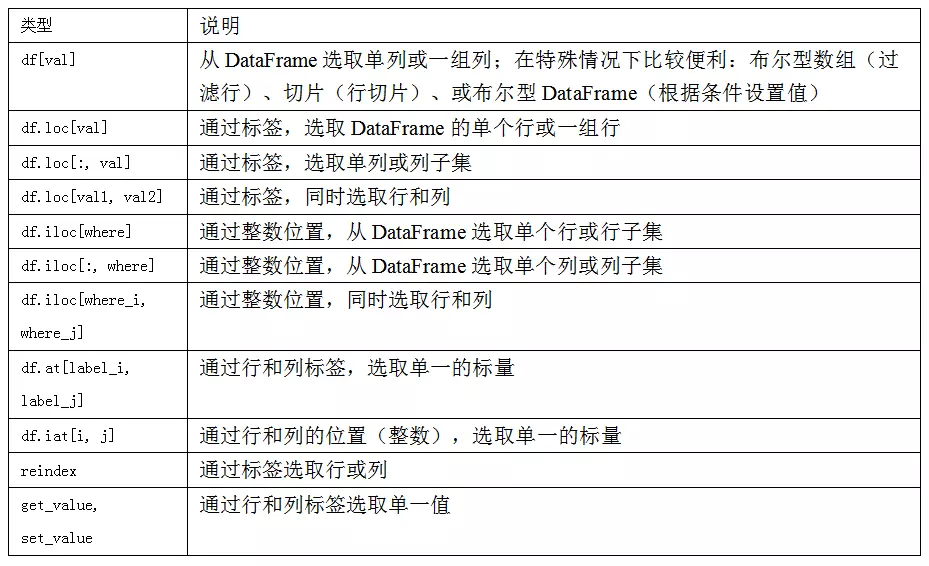

# 整数索引

In [71]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

ser[-1]会错但是对于非整数的索引，ser[-1]是对的

In [72]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

    为了进行统一，如果轴含有整数，数据总会使用标签。为了更准确，清使用loc或者iloc

In [73]:
ser[:1]

0    0.0
dtype: float64

In [74]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [75]:
ser.iloc[:1]

0    0.0
dtype: float64

### 算术运算和数据对齐

pandas最重要的一个功能是，它可以对不同索引的对象进行算术运算。在将对象相加时，如果存在不同的索引对，则结果的索引就是该索引对的并集。对于有数据库经验的用户，这就像在索引标签上进行自动外连接。看一个简单的例子：

In [76]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
              index=['a', 'c', 'e', 'f', 'g'])
print(s1)
print(s2)

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64
a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64


In [77]:
s1+s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

自动的数据对齐操作在不重叠的索引处引入了NA值。缺失值会在算术运算过程中传播。

对于DataFrame，对齐操作会同时发生在行和列上：

In [78]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                  index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [79]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [80]:
df1+df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


因为'c'和'e'列均不在两个DataFrame对象中，在结果中以缺省值呈现。行也是同样。

如果DataFrame对象相加，没有共用的列或行标签，结果都会是空：

In [81]:
df1 = pd.DataFrame({'A':[1,2]})
df2 = pd.DataFrame({'B':[3,4]})
df1

,A
0,1
1,2


In [82]:
df2

,B
0,3
1,4


In [83]:
df1-df2

,A,B
0,NaN,NaN
1,NaN,NaN


# 在算术方法中填充值

在对不同索引的对象进行算术运算时，你可能希望当一个对象中某个轴标签在另一个对象中找不到时填充一个特殊值（比如0）：

In [84]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                 columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                 columns=list('abcde'))
df2.loc[1,'b'] = np.nan
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [85]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [86]:
df1+df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [87]:
df1.add(df2,fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


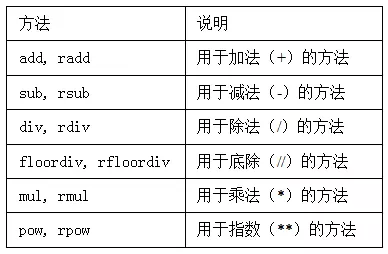

In [88]:
1/df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [89]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


与此类似，在对Series或DataFrame重新索引时，也可以指定一个填充值：

In [90]:
df1.reindex(columns=df2.columns,fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


# DataFrame和Series之间的运算

跟不同维度的NumPy数组一样，DataFrame和Series之间算术运算也是有明确规定的。先来看一个具有启发性的例子，计算一个二维数组与其某行之间的差：

In [91]:
arr = np.arange(12.).reshape((3,4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [92]:
arr[0]

array([0., 1., 2., 3.])

In [93]:
arr-arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

当我们从arr减去arr[0]，每一行都会执行这个操作。这就叫做广播.DataFrame和Series之间的运算差不多也是如此：（broadcasting）

In [110]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                      index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]

In [111]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [112]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

默认情况下，DataFrame和Series之间的算术运算会将Series的索引匹配到DataFrame的列，然后沿着行一直向下广播：

In [113]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


如果某个索引值在DataFrame的列或Series的索引中找不到，则参与运算的两个对象就会被重新索引以形成并集

In [114]:
series2 = pd.Series(range(3),index=['b','e','f'])
print(series2)
frame+series2

b    0
e    1
f    2
dtype: int64


,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


如果你希望匹配行且在列上广播，则必须使用算术运算方法。例如：

In [99]:
series3 = frame['d']
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [100]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [101]:
frame.sub(series3,axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


传入的轴号就是希望匹配的轴。在本例中，我们的目的是匹配DataFrame的行索引（axis='index' or axis=0）并进行广播。

### 函数应用和映射

NumPy的ufuncs（元素级数组方法）也可用于操作pandas对象：

In [115]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.664397,0.363224,0.360983
Ohio,0.469388,1.020675,1.972942
Texas,-0.233305,1.260885,-0.727552
Oregon,0.767124,1.116452,-0.270795


In [117]:
np.abs(frame)

,b,d,e
Utah,0.664397,0.363224,0.360983
Ohio,0.469388,1.020675,1.972942
Texas,0.233305,1.260885,0.727552
Oregon,0.767124,1.116452,0.270795


另一个常见的操作是，将函数应用到由各列或行所形成的一维数组上。DataFrame的apply方法即可实现此功能：

In [118]:
f = lambda x: x.max() - x.min()

In [119]:
frame.apply(f)

b    1.000429
d    0.897661
e    2.700494
dtype: float64

    这里的函数f，计算了一个Series的最大值和最小值的差，在frame的每列都执行了一次。结果是一个Series，使用frame的列作为索引。
    如果传递axis='columns'到apply，这个函数会在每行执行：

In [120]:
frame.apply(f,axis='columns')

Utah      0.303413
Ohio      1.503554
Texas     1.988437
Oregon    1.387247
dtype: float64

许多最为常见的数组统计功能都被实现成DataFrame的方法（如sum和mean），因此无需使用apply方法。

传递到apply的函数不是必须返回一个标量，还可以返回由多个值组成的Series

In [121]:
def f(x):
    return pd.Series([x.min(),x.max()],index=['min','max'])
frame.apply(f)

,b,d,e
min,-0.233305,0.363224,-0.727552
max,0.767124,1.260885,1.972942


元素级的Python函数也是可以用的。假如你想得到frame中各个浮点值的格式化字符串，使用applymap即可：

In [122]:
format = lambda x:'%.2f' % x
frame.applymap(format)

,b,d,e
Utah,0.66,0.36,0.36
Ohio,0.47,1.02,1.97
Texas,-0.23,1.26,-0.73
Oregon,0.77,1.12,-0.27


之所以叫applymap，是因为Series有一个用于应用元素函数的map方法

In [123]:
frame['e'].map(formatrmat)

Utah       0.36
Ohio       1.97
Texas     -0.73
Oregon    -0.27
Name: e, dtype: object

### 排序和排名

根据条件对数据集进行排序需要用到sort_index方法

In [124]:
obj = pd.Series(range(4),index=['d','a','b','c'])

In [125]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

对于DataFrame，则可以根据任意一个轴上的索引进行排序

In [127]:
frame = pd.DataFrame(np.arange(8).reshape((2,4)),
                    index = ['three','one'],
                    columns=['d','a','b','c'])
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [128]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


数据默认是升序降序需要把ascending设置为False

In [129]:
frame.sort_index(axis=1,ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


    若要对Series进行排序，可以使用sort_value

In [130]:
obj = pd.Series([4,7,-3,2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [131]:
obj = pd.Series([4,np.nan,7,np.nan,-3,2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

当排序一个DataFrame时，你可能希望根据一个或多个列中的值进行排序。将一个或多个列的名字传递给sort_values的by选项即可达到该目的

In [132]:
frame = pd.DataFrame({'b':[4,7,-3,2],'a':[0,1,0,1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [133]:
frame.sort_values(by = 'b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


排名会从1开始一直到数组中有效数据的数量。接下来介绍Series和DataFrame的rank方法。默认情况下，rank是通过“为各组分配一个平均排名”的方式破坏平级关系的：

In [135]:
obj = pd.Series([7,-5,7,4,2,0,1])
obj.rank()

0    6.5
1    1.0
2    6.5
3    5.0
4    4.0
5    2.0
6    3.0
dtype: float64

也可以根据值在原数据中出现的顺序给出排名：

In [136]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    5.0
4    4.0
5    2.0
6    3.0
dtype: float64

降序排名

In [137]:
obj.rank(ascending = False,method='max')

0    2.0
1    7.0
2    2.0
3    3.0
4    4.0
5    6.0
6    5.0
dtype: float64

所有的method选项

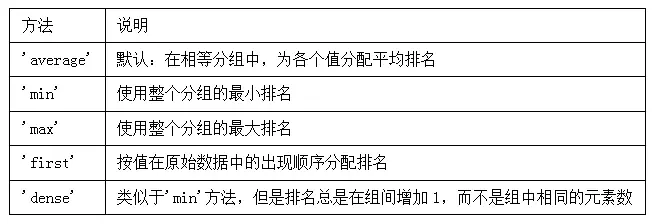

DataFrame可以在行或者列上计算排名

In [141]:
frame = pd.DataFrame({'b':[4.3,7,-3,2],'a':[0,1,0,1],'c':[-2,5,8,-2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [142]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### 带有重复标签的轴索引

直到目前为止，范例都是唯一的轴标签。虽然有许多pandas函数都要求标签唯一，但这都不是强制性的

In [144]:
obj = pd.Series(range(5),index = ['a','a','b','b','c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [145]:
obj.index.is_unique

False

对于带有重复值的索引，数据选取的行为将会有些不同。如果某个索引对应多个值，则返回一个Series；而对应单个值的，则返回一个标量

In [146]:
obj['a']

a    0
a    1
dtype: int64

In [147]:
obj['c']

4

# 5.3 汇总和计算描述统计

pandas 对象拥有一组常用的数学和统计方法。它们大部分属于约简和汇总统计，用于从Series中单个提取值（如sum或者mean）或从DataFrame的行和列中提取一个Series。和对应的Numpy相比，他们基于没有缺失数据的假设而构建的。看一个简单的DataFrame

In [151]:
df = pd.DataFrame([[1.4,np.nan],[7.1,-4.5],
                 [np.nan,np.nan],[0.75,-1.3]],
                 index=['a', 'b', 'c', 'd'],
                 columns=['one','two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [152]:
df.sum()

one    9.25
two   -5.80
dtype: float64

NA值会自动被排除，除非整个切片（这里指的是行或列）都是NA。通过skipna选项可以禁用该功能：

In [153]:
df.mean(axis='columns',skipna = False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

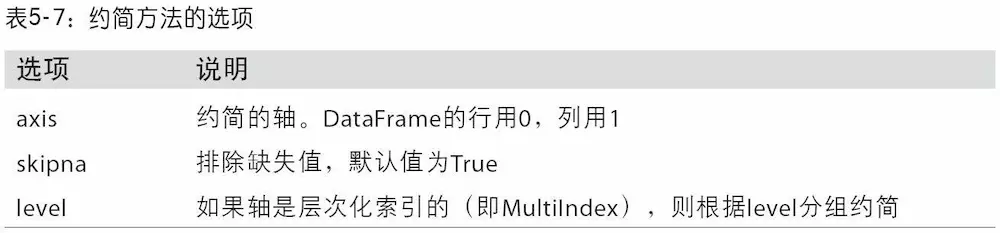

有些方法如(idxmin和idmax)返回的是间接统计(比如达到最小值或者最大值)

In [154]:
df.idxmax()

one    b
two    d
dtype: object

另一些方法则是累计型的

In [155]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


还有一种方法，不是简约型也不是累计型。describe用于一次性产生多个汇总统计

In [156]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [158]:
obj = pd.Series(['a','a','b','c']*4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

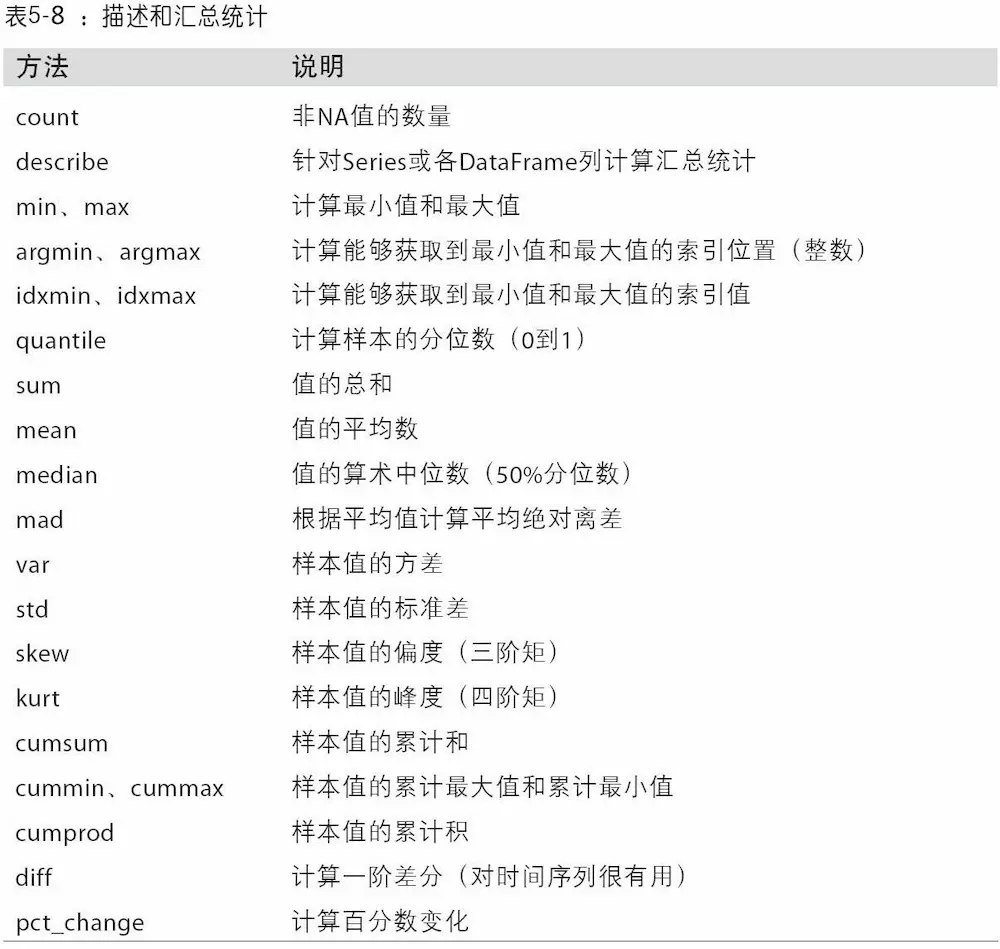

### 相关系数与协方差

In [161]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas_datareader.data as web
import pandas as pd
all_data = {ticker:web.get_data_yahoo(ticker)
           for ticker in['AAPL','IBM','MSFT','GOOG']}
price = pd.DataFrame({ticker:data['Adj Close']
                     for ticker,data in all_data.items()})
volume = pd.DataFrame({ticker:data['Volume']
                      for ticker,data in all_data.items()})

In [3]:
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2019-08-05,-0.052348,-0.044075,-0.034258,-0.034900
2019-08-06,0.018930,-0.000213,0.018758,0.015300
2019-08-07,0.010355,-0.011511,0.004380,0.003453
2019-08-08,0.022056,0.018983,0.026685,0.026244
2019-08-09,-0.008240,-0.028337,-0.008496,-0.013936


Series的corr方法用于计算两个Series中重叠的、非NA的、按索引对齐的值的相关系数。与此类似，cov用于计算协方差：

In [4]:
returns['MSFT'].corr(returns['IBM'])

0.48838108520315066

In [6]:
returns['MSFT'].cov(returns['IBM'])

8.70877136247192e-05

由于MSTF是一个合理的python属性，我们还可以用更加简洁的语法选择列

In [7]:
returns.MSFT.corr(returns.IBM)

0.48838108520315066

利用DataFrame的corrwith方法，你可以计算其列或行跟另一个Series或DataFrame之间的相关系数。传入一个Series将会返回一个相关系数值Series（针对各列进行计算）：

In [8]:
returns.corrwith(returns.IBM)

AAPL    0.381671
IBM     1.000000
MSFT    0.488381
GOOG    0.402539
dtype: float64

传入一个DataFrame则会计算按列名配对的相关系数。这里，我计算百分比变化与成交量的相关系数：

In [9]:
returns.corrwith(volume)

AAPL   -0.062016
IBM    -0.151920
MSFT   -0.090345
GOOG   -0.018866
dtype: float64